In [1]:
from mnist_models import Classifier, init_weights, accuracy, validate
from communicator import Server 
import torch
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader, Subset
import torch.nn as nn
import torch.nn.functional as F
import threading

%matplotlib inline
torch.manual_seed(0)  # for reproducibility
dataset_size = 60000

################################################
#               META INFO                      #
################################################
NUM_WORKERS = 1
perm_idxs = torch.randperm(dataset_size)
val_idxs = perm_idxs[-10000:]

################################################
#               Get Datasets                   #
################################################
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', download=True, train=True, transform=transforms.ToTensor())
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

batch_size = 128
val_ds = Subset(dataset, val_idxs)
val_data = dataset.data[val_idxs]
val_targets = dataset.targets[val_idxs]

# train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

################################################
#            Get Models and Initialize         #
################################################
model = Classifier(hidden_1=0)
model.apply(init_weights)

lr = 0.01
lossfn = F.cross_entropy
opt = torch.optim.SGD(model.parameters(), lr)

In [2]:
################################################
#    Networking Stuff (only run this once!)    #
################################################
PORT = 1232
serv_model = Server(PORT)
PORT2 = 1233
serv_grad = Server(PORT2)

In [3]:
def model_server():
	print("model server thread is up")
	global model
	while True:
		result = serv_model.recv()
		#print(f"Received obj of type {str(type(result))} and content:\n{str(result)}")
		
		#send weights
		serv_model.reply(model.state_dict(), PORT)
		#print(f"Sent obj of type {str(type(w))} and content:\n{str(w)}")

        
def rescale_params(statedict, validation_grad):
    for name in statedict:
        c = torch.linalg.norm(validation_grad[name])/torch.linalg.norm(statedict[name])
        statedict[name] = c*statedict[name]
    return statedict

def compute_stochastic_descent_score(g, v, gamma, rho):
    """
    Compute gamma*<v,g> - rho*norm(g)
    Assume that g and v are pytorchstate dicts containing the model's parameter
    """
    dot_prod_tally = 0
    norm_tally = 0
    for name in g:
        dot_prod_tally += torch.dot(g[name].view(-1), v[name].view(-1))
        norm_tally += torch.linalg.norm(g[name])**2
    return gamma*dot_prod_tally - rho*norm_tally

def check_convergence():
    pass

def update_gradient(model, g):
    """
    g is the statedict of 
    """
    for name, p in model.named_parameters():
        p.grad = g[name]

model server thread is up
('172.18.0.3', 1232)
Score = 0.0052588870748877525 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0033120117150247097 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.005319473799318075 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000988643616437912 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.004706938285380602 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.002462297212332487 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0035497951321303844 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0037421099841594696 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.004857776686549187 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.004734246991574764 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0047914101742208 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.007864521816372871 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.006332471966743469 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.008192915469408035 and threshol

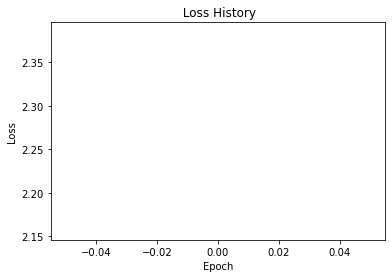

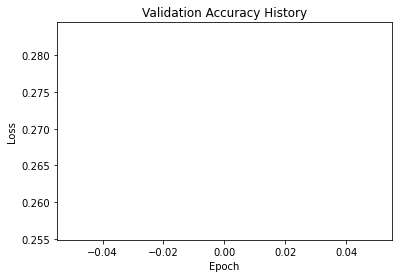

Score = 0.0032704458571970463 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.005380535498261452 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0025430188979953527 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0014329322148114443 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.004842106252908707 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00591086782515049 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.005880715325474739 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.008681008592247963 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.004147099331021309 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0044160340912640095 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0035006487742066383 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0029838858172297478 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0023347437381744385 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0028361717704683542 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00

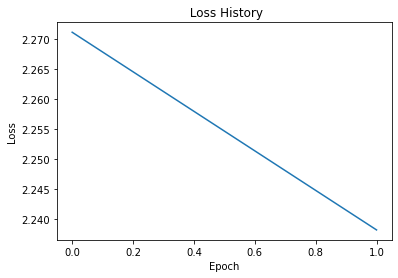

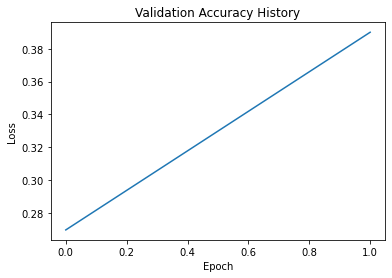

Score = -0.0049688322469592094 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.002187206409871578 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0017043894622474909 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0022397409193217754 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0018528641667217016 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0015365076251327991 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005604126490652561 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0011876343050971627 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00029712985269725323 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0007743407040834427 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011736643500626087 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011030258610844612 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0019401984754949808 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0019801210146397352 and threshold -0.03
('172.18.0.3', 

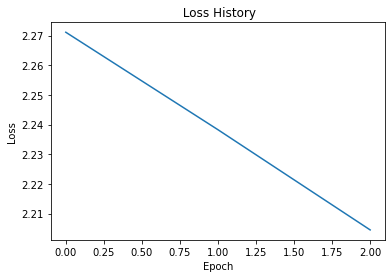

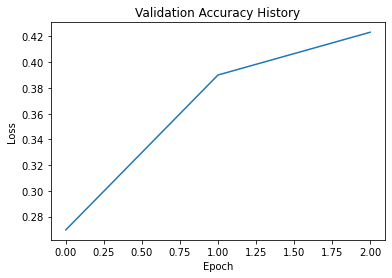

Score = -0.001635525026358664 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005232092808000743 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0011198108550161123 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005030903266742826 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00012308440636843443 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00041389139369130135 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.001042004907503724 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.001106073148548603 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009034123504534364 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00048778008203953505 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010209379252046347 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.001524176332168281 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009325001738034189 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00039336230838671327 and threshold -0.03
('172.18.0.3', 1232)
S

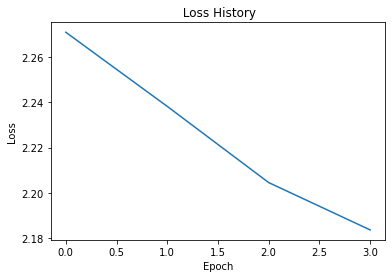

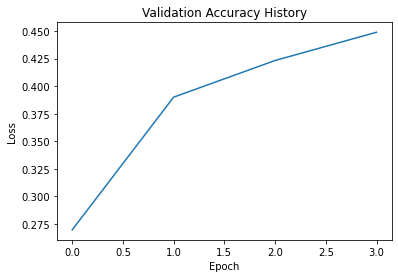

Score = 0.00022550445282831788 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00043575692689046264 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001318382564932108 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004515253531280905 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007201149128377438 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0011627977946773171 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.002108787652105093 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0016868533566594124 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0012173018185421824 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0013778922148048878 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0025145458057522774 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003519699675962329 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0013134600594639778 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0008640969172120094 and threshold -0.03
('172.18.0.3', 1

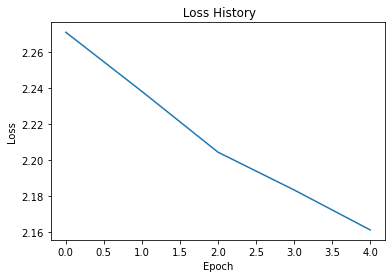

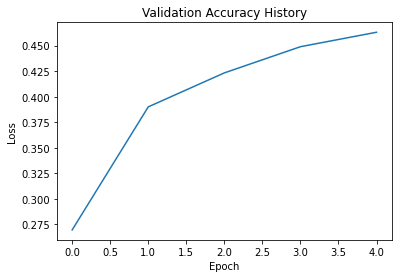

Score = 8.742621866986156e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00016210932517424226 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00024815561482682824 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0011851571034640074 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000529302516952157 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00018015841487795115 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0015486062038689852 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002861347747966647 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.952838834375143e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007766193593852222 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001833919668570161 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0013811361277475953 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0026682105381041765 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0008220960735343397 and threshold -0.03
('172.18.0.3', 1

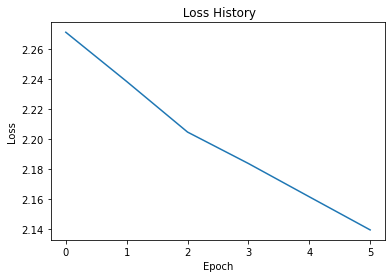

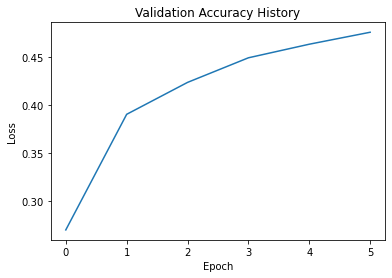

Score = -0.00025814963737502694 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00012930284719914198 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00045996333938091993 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009754504426382482 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005342303193174303 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0013983703684061766 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003989413380622864 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00045752900769002736 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0015558337327092886 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.09178901463747e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002545193419791758 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0012151619885116816 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0008453147602267563 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0009877107804641128 and threshold -0.03
('172.18.0.3'

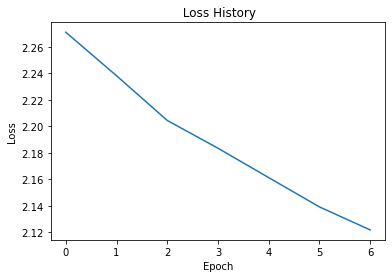

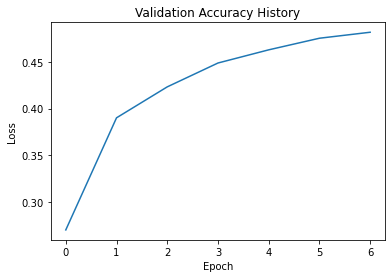

Score = 2.2276828531175852e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004574258055072278 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006347759626805782 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013638936798088253 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002884946879930794 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002996636903844774 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00015490979421883821 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002608377835713327 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00039617682341486216 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003764122084248811 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006089897942729294 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001401244371663779 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002404482802376151 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00025885674403980374 and threshold -0.03
('172.18.0.3'

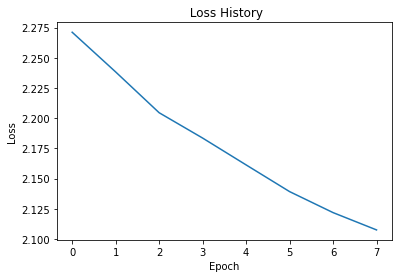

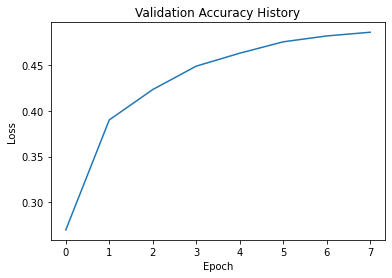

Score = 0.0003515188582241535 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0008518077665939927 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0008508192258886993 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.334055120125413e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000573159079067409 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005473890341818333 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00030504149617627263 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006154031143523753 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00045262588537298143 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000455663277534768 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020214184769429266 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.43861130811274e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004185277794022113 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004726100596599281 and threshold -0.03
('172.18.0.3',

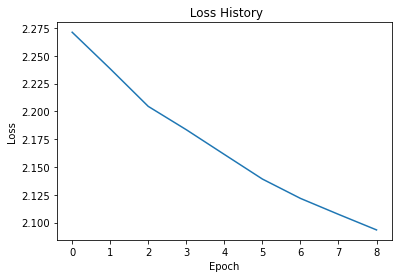

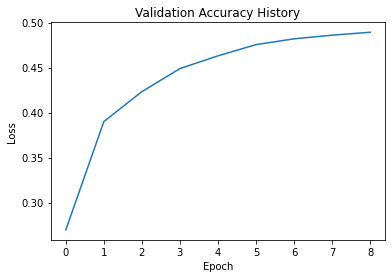

Score = -0.0007352110114879906 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.691663732752204e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0010496721370145679 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017919024685397744 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006735041388310492 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019511778373271227 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006776815862394869 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.001211529946886003 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.1896669901907444e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0013700551353394985 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00023931486066430807 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0008009329321794212 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00024111667880788445 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.658623270690441e-05 and threshold -0.03
('172.18.0.

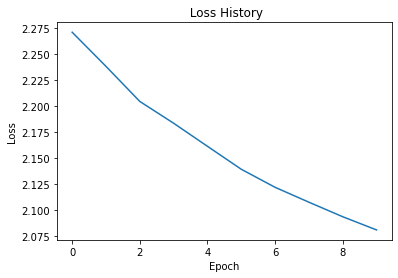

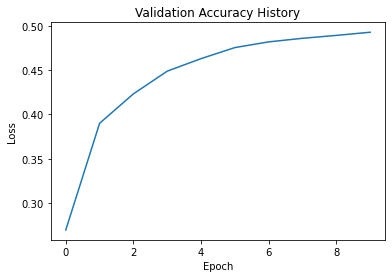

Score = -0.00042814965127035975 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004587123403325677 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004278840497136116 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.340015145018697e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002878434315789491 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00032052426831796765 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021402539277914912 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019452569540590048 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00039367296267300844 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001699631684459746 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.938502727076411e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002293445577379316 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.3632775992155075e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003570315893739462 and threshold -0.03
('172.18.

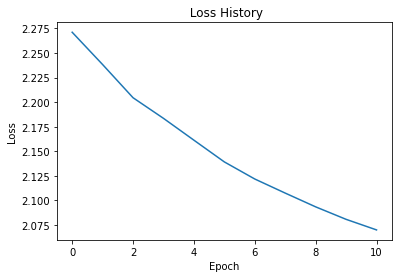

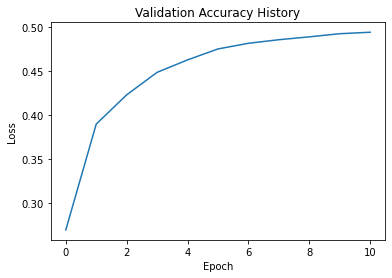

Score = 0.00010371976532042027 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00031918578315526247 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00018397936946712434 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00012720978702418506 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021042299340479076 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0009636016911827028 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004618187085725367 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007723224116489291 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000724041077774018 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002066410961560905 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00047979477676562965 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019097470794804394 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00015824809088371694 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0009717727079987526 and threshold -0.03
('172.18.0

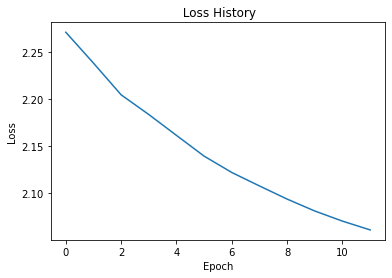

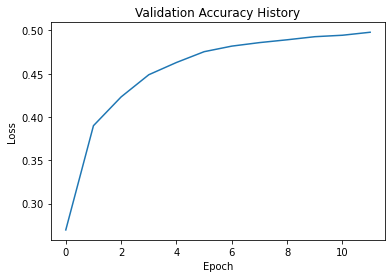

Score = 3.916025161743164e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.815932622179389e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002646467764861882 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000576473365072161 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001700176071608439 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017655512783676386 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001529071305412799 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.551393794827163e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005328346160240471 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011835177429020405 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013676032540388405 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00015547298244200647 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0004266220494173467 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00041618524119257927 and threshold -0.03
('172.18.0.3', 12

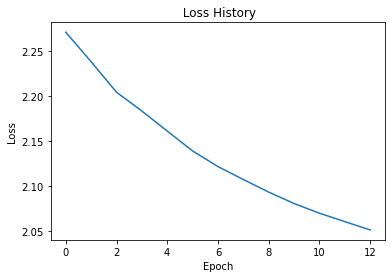

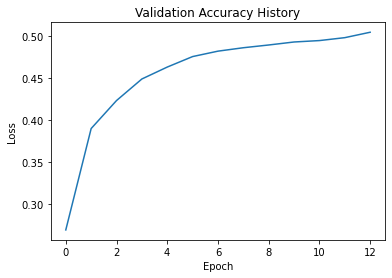

Score = -0.0008042644476518035 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006349176401272416 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.347507148049772e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011650877422653139 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011197544517926872 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010135694174095988 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00031201884848996997 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00014835302135907114 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006063347100280225 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00014244604972191155 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.257098332047462e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.0273022023029625e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.8496822020970285e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.940308518707752e-05 and threshold -0.03
('172.18.

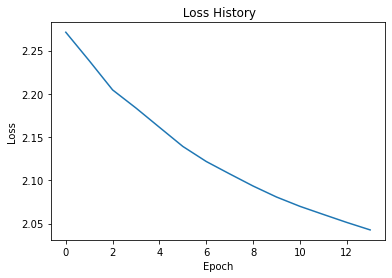

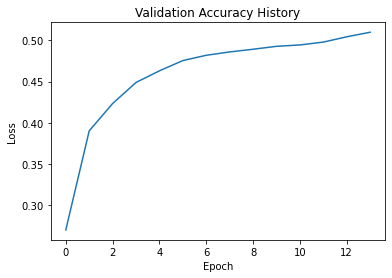

Score = -0.000570446252822876 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00031106037204153836 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00014341765199787915 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004682521685026586 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00012957790750078857 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001454438315704465 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00029878676286898553 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00016599788796156645 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0004959715297445655 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00033623084891587496 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0007376302382908762 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0008382065570913255 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00028442309121601284 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007181743276305497 and threshold -0.03
('172.18.0.3'

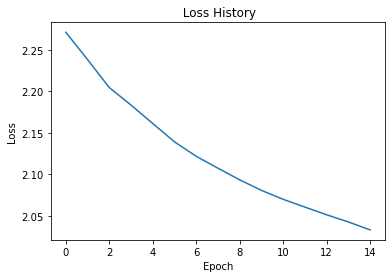

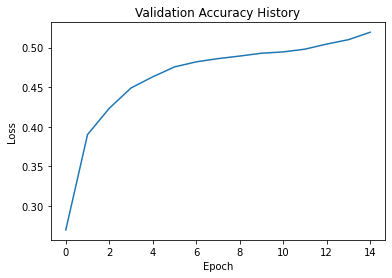

Score = 7.77433451730758e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00045236863661557436 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003276356728747487 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002594657998997718 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002675489813555032 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0010262234136462212 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005099747213535011 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006946549983695149 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00022742949659004807 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007334763067774475 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003104072529822588 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009829204063862562 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022463552886620164 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006791689665988088 and threshold -0.03
('172.18.0.3', 1232

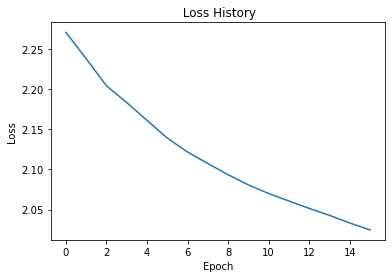

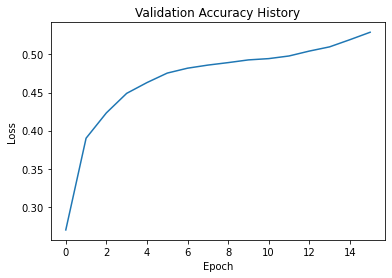

Score = 0.0006063688197173178 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000129002146422863 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0014137652469798923 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0012507331557571888 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00026132073253393173 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00013924410450272262 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019861017062794417 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016088547999970615 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011662626639008522 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.576581265311688e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00028837163699790835 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00015574551071040332 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022496805468108505 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011187916970811784 and threshold -0.03
('172.18.0.3

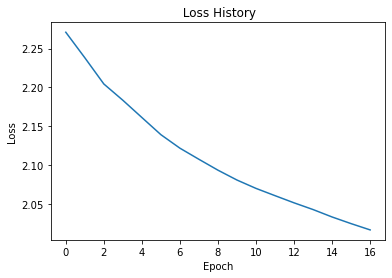

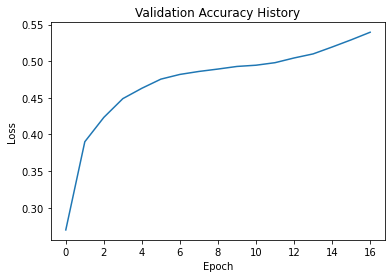

Score = 0.00029399601044133306 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005662391195073724 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003904952318407595 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.661331720650196e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019914412405341864 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00022703449940308928 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00026072582113556564 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003253565519116819 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.773791831918061e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.076553836464882e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.001434187637642026 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.001382289920002222 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.518299829214811e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007879998302087188 and threshold -0.03
('172.18.0.3', 1232

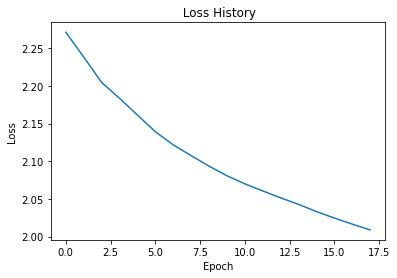

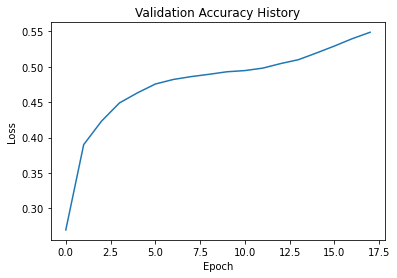

Score = 0.00026335063739679754 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016404493362642825 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00027101306477561593 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00020131503697484732 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002816977212205529 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0009133153944276273 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00034456735011190176 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00031404895707964897 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0014155108947306871 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00029864622047170997 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.243619231507182e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.769851850345731e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013185763964429498 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0008361106156371534 and threshold -0.03
('172.18.0.3'

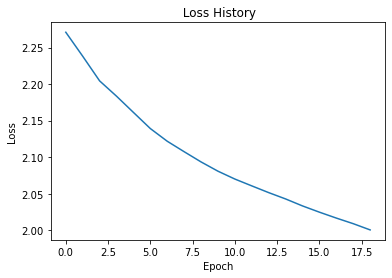

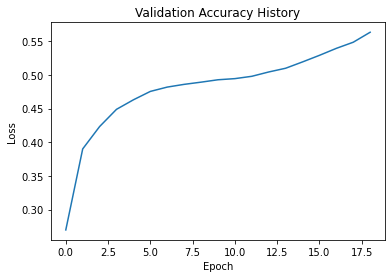

Score = -0.00017390947323292494 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.8416288336738944e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00021715942420996726 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013493052392732352 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.19810598436743e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003695609630085528 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.2363211074844e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005102586001157761 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000563897134270519 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0004606035363394767 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003125416114926338 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00046434346586465836 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.379005986265838e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003566107770893723 and threshold -0.03
('172.18.0.3', 1232

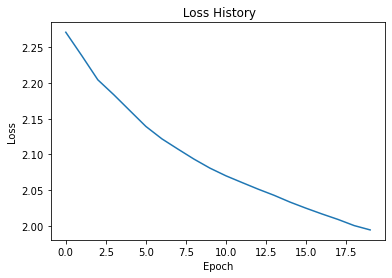

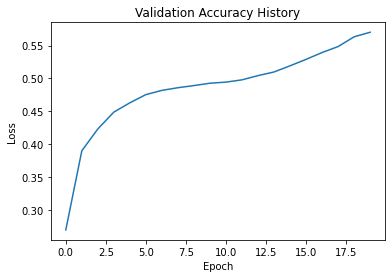

Score = -0.00012334500206634402 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011376675684005022 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005396084161475301 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.983807103708386e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00027167401276528835 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001624262222321704 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016965407121460885 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00012798563693650067 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001140619715442881 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.630276377312839e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020776773453690112 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000179910974111408 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003487889189273119 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.146059604361653e-05 and threshold -0.03
('172.18.0.3'

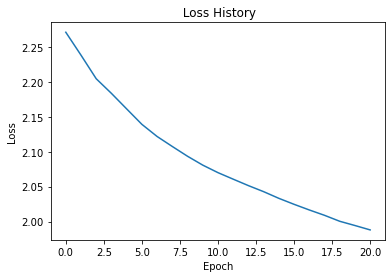

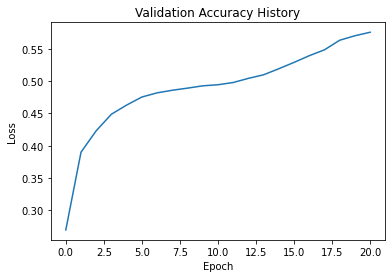

Score = 0.0003030868247151375 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013245726586319506 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.499245990999043e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001846118684625253 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.370986087247729e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00035474810283631086 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011446763528510928 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007805607747286558 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003868862404488027 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001286878832615912 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0011442338582128286 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009272927418351173 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.048441329970956e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0007060704519972205 and threshold -0.03
('172.18.0.3', 123

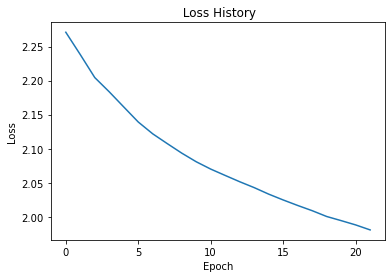

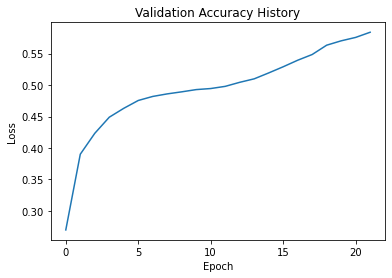

Score = 0.00031589853460900486 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.270120502449572e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005294497823342681 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010009430116042495 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001296698465012014 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00024854563525877893 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.7269783206284046e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00019759259885177016 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002628161746542901 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00018863749573938549 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00012965872883796692 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002632428368087858 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0004654215299524367 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000271674245595932 and threshold -0.03
('172.18.0.3', 1

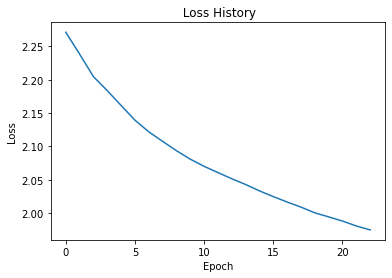

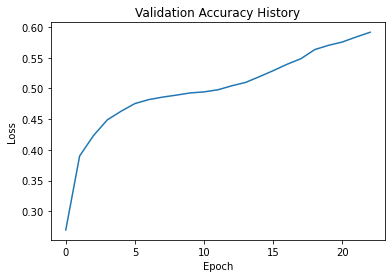

Score = -4.191718471702188e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.6411907533183694e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001267600164283067 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.955836629960686e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.546482134377584e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003615648311097175 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004203653079457581 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003104072529822588 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00043046774226240814 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.804732351563871e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.993408118840307e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.5955108867492527e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.2141269659623504e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022853963309898973 and threshold -0.03
('172.18.0.

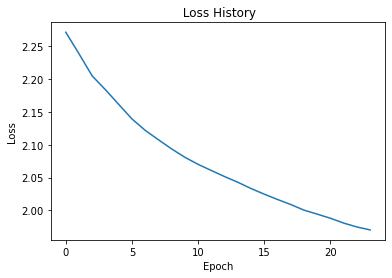

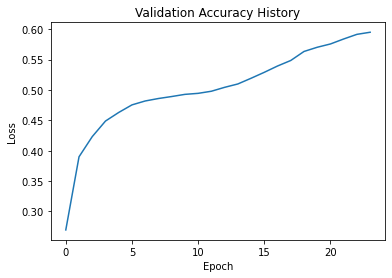

Score = 0.00020627494086511433 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003452705277595669 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.518079317174852e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002799809444695711 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.2263243813067675e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.251223385334015e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.753359386697412e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.662137795705348e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010301135625923052 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.96038672584109e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00020793965086340904 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013058498734608293 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001560866367071867 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011456577340140939 and threshold -0.03
('172.18.0.3'

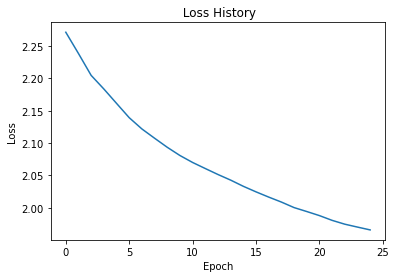

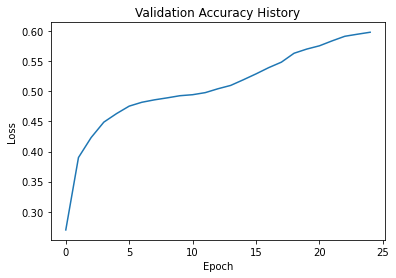

Score = 5.380663787946105e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010190016473643482 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.4102730094455183e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.631776002701372e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.076895129401237e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.525759428972378e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.315487214829773e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013604840205516666 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.676257281564176e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.4504825230687857e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.20330499461852e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.7558955480344594e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.459620686247945e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.8409155018161982e-05 and threshold -0.03
('172.18.0.3', 1

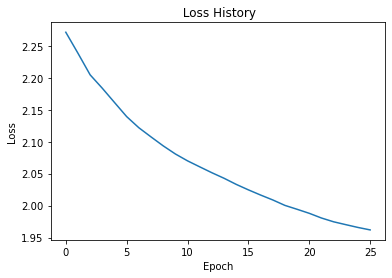

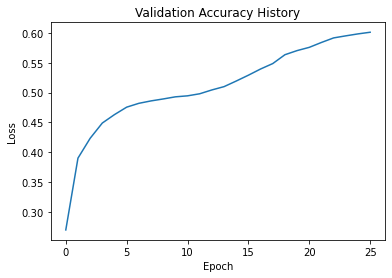

Score = -3.668676799861714e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013812909310217947 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.7348104999400675e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001005262674880214 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.0352414392400533e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.9644230380654335e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00028639091760851443 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003291203174740076 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011499050015117973 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00025923625798895955 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00025708123575896025 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.113398947287351e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005394099280238152 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002895863726735115 and threshold -0.03
('172.18.0

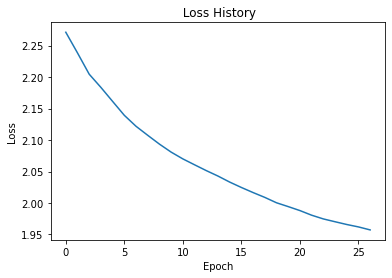

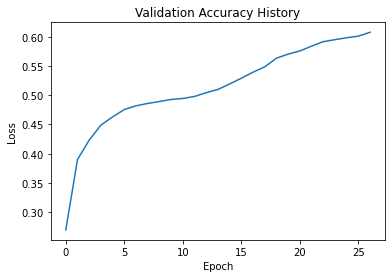

Score = 0.000562497356440872 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0007318594143725932 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005652024992741644 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006866839248687029 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00012303743278607726 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00025254359934479 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00014617769920732826 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00027008532197214663 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001311353116761893 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.6484278603456914e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00010985266999341547 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.601811037398875e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002792757877614349 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00019575189799070358 and threshold -0.03
('172.18.0.3', 1232

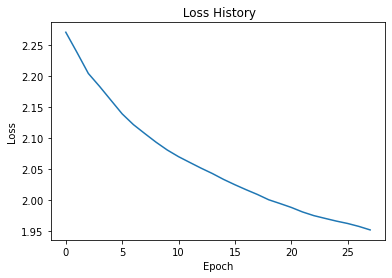

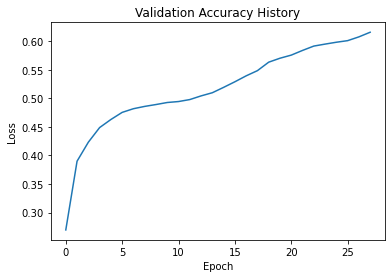

Score = 0.0003039812436327338 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001309321087319404 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.9735307432711124e-07 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.834268712438643e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00014416489284485579 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00020737253362312913 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006908001378178596 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001380578032694757 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007209875038824975 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006982681807130575 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00012672558659687638 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002868120209313929 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00039828778244554996 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.9588740542531013e-05 and threshold -0.03
('172.18.0.3', 12

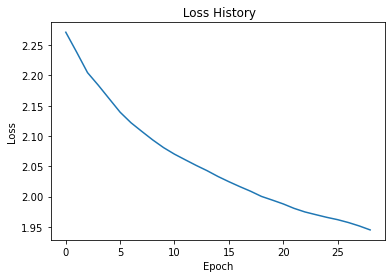

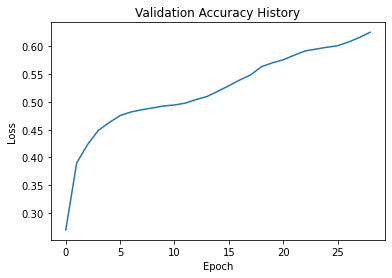

Score = 1.4557037502527237e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005702140624634922 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003621928917709738 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021741958335042 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003086490323767066 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.629380317870528e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00015972653636708856 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021529676450882107 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.475337532814592e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00023212276573758572 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017999063129536808 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005568937631323934 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006148360553197563 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006063898326829076 and threshold -0.03
('172.18.0.3', 1232

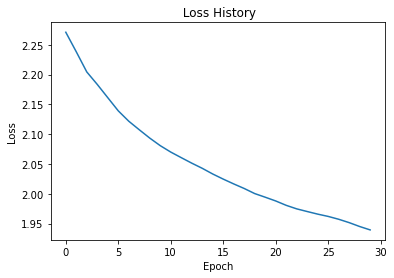

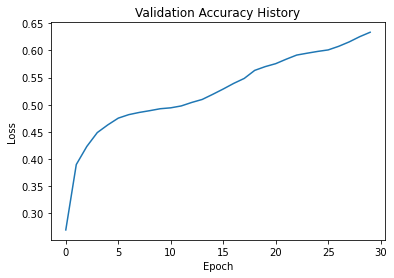

Score = 0.00014808749256189913 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.7204117183573544e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001682136207818985 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000153649365529418 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00018509912479203194 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0010190223110839725 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006765094585716724 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005557198310270905 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0010989359579980373 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0009615356102585793 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001787356159184128 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.5683693820610642e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00031215534545481205 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00030437129316851497 and threshold -0.03
('172.18.0.3', 

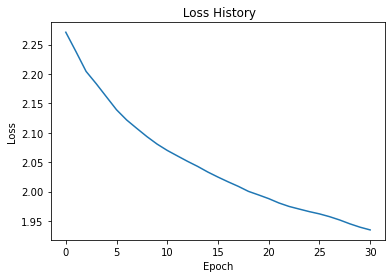

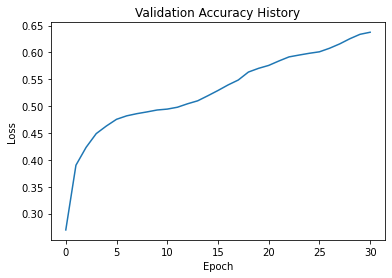

Score = 5.468806193675846e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.472117921570316e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.388382750330493e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.890239193220623e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.2447663620114326e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011443298717495054 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022748002083972096 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.2380714653991163e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.30638072732836e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010886679228860885 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000314643926685676 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005921590491198003 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006080912426114082 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004937772755511105 and threshold -0.03
('172.18.0.3', 123

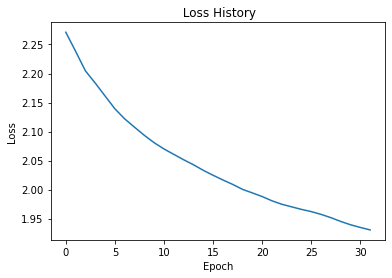

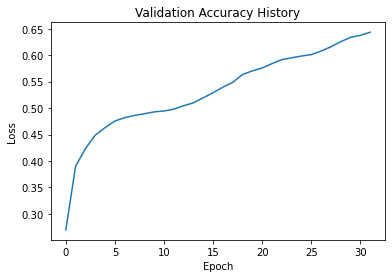

Score = 0.0003765274304896593 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.5166507586836815e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.943847544491291e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.005529187154025e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.382026524282992e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.237639172468334e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001379134482704103 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00043985454249195755 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.6119745345786214e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003085977805312723 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006855528336018324 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00014189156354404986 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004948719870299101 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0006936030695214868 and threshold -0.03
('172.18.0.3', 12

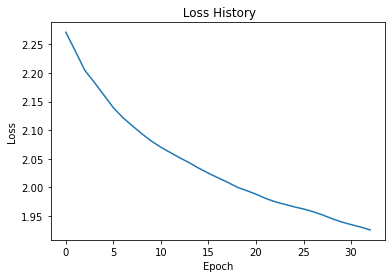

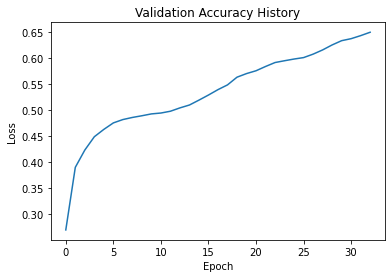

Score = 9.29877714952454e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011526771413628012 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00029969189199618995 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00013783687609247863 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002242865739390254 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00015780373360030353 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011812132288469002 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.143060116097331e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.021588003728539e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.348644531797618e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.654173972085118e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.8325885068625212e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.673192547168583e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001333380350843072 and threshold -0.03
('172.18.0.3', 1

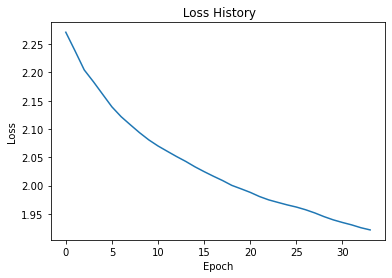

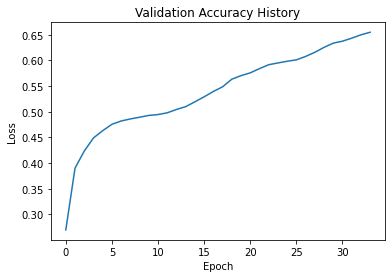

Score = 4.6922737965360284e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010804878547787666 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017055185162462294 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00018996048311237246 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.567619417794049e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.200704178307205e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.035755071323365e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.1155778085812926e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.346826118417084e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.114461575634778e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.1650753701105714e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.9890648622531444e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00010317654960090294 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.2075909732375294e-05 and threshold -0.03
('172.18.0.3', 1

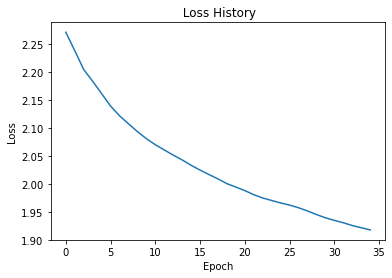

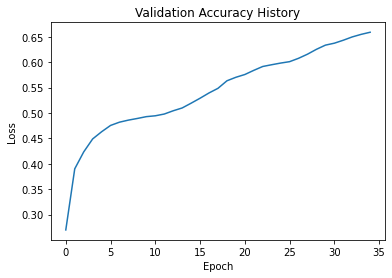

Score = 0.00015057367272675037 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.674591087270528e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.076071829535067e-07 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.751153366873041e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.406875763786957e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001792427501641214 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00042059808038175106 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0004627754387911409 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.746511932462454e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001418564934283495 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001688022748567164 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.000175062712514773 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.706962060183287e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00032120541436597705 and threshold -0.03
('172.18.0.3', 1232)
S

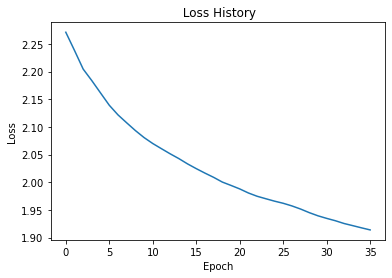

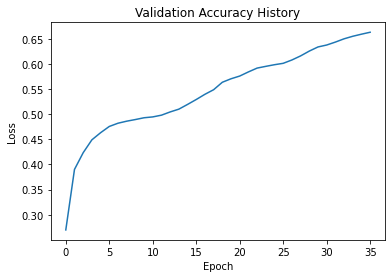

Score = 7.956803892739117e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.526792564429343e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011786432878579944 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.013591726310551e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.880596967879683e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000463998963823542 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.4169112546369433e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011820113286376 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.008072083815932e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005154471728019416 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.8637244617566466e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003238168719690293 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00040283158887177706 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005520685808733106 and threshold -0.03
('172.18.0.3', 1232

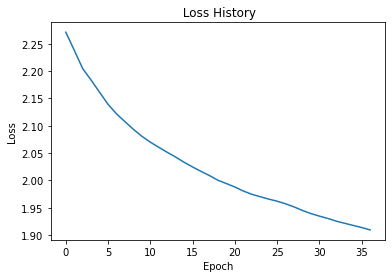

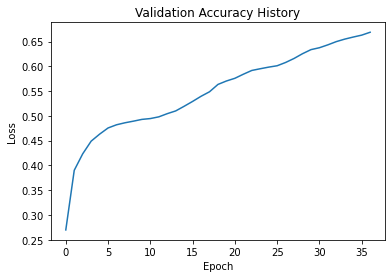

Score = -0.0002501108101569116 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017007712449412793 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016841513570398092 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004915449535474181 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00010213840869255364 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0006916333804838359 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00036349176662042737 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.001034202054142952 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004391801485326141 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00023127748863771558 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003613222506828606 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005889225285500288 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002731543791014701 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0003703422553371638 and threshold -0.03
('172.18.0.3', 

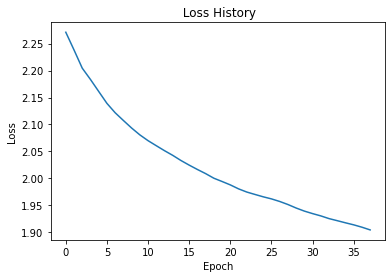

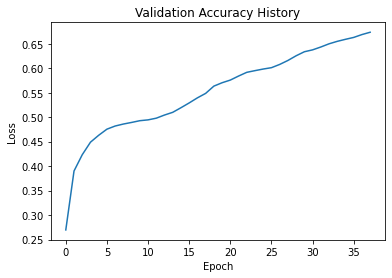

Score = 0.00025293155340477824 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00024937072885222733 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00013695978850591928 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.4982884749770164e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.726412827149034e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0005140465218573809 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011948263272643089 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011652029934339225 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001896488683996722 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0001853661669883877 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00017292427946813405 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003523446212057024 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00041095458436757326 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00027901065186597407 and threshold -0.03
('172.18.0.3'

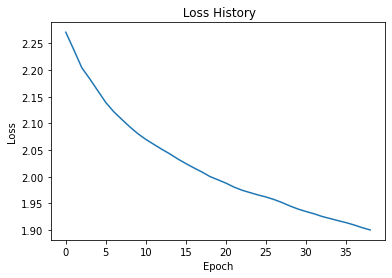

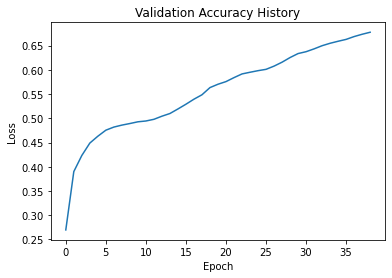

Score = -0.0001545918930787593 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021886957983952016 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.038629312068224e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00023814848100300878 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.0002299582411069423 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.96619109576568e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.828443732345477e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.5310549719724804e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002883409906644374 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.5865162974223495e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011056273069698364 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00012860208516940475 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021286247647367418 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.976580723654479e-05 and threshold -0.03
('172.18.0.

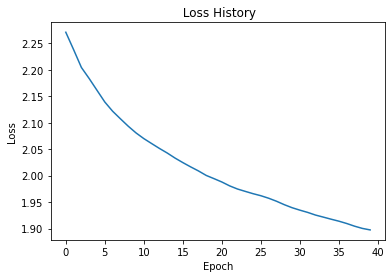

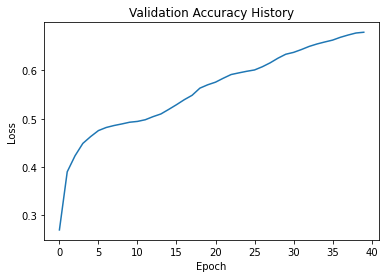

Score = 0.0001382895279675722 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00012470931687857956 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.823889760999009e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.801034421892837e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.952656359411776e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 7.910057320259511e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.093433618545532e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001787209912436083 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.6091350668575615e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00017344910884276032 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.452507219975814e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.628825990948826e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.3017539458815008e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011965600424446166 and threshold -0.03
('172.18.0.3'

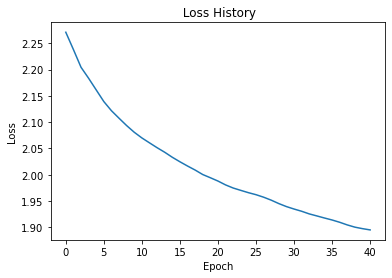

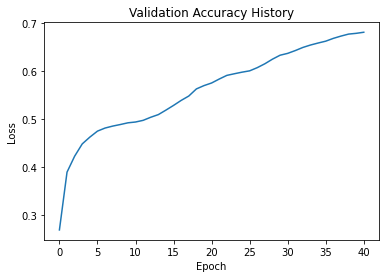

Score = 2.4620036128908396e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 4.975602496415377e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011700557661242783 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.3595464881509542e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.512623516144231e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.190462151309475e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001498305209679529 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00019991814042441547 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.139903856208548e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00017684815975371748 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.540206181351095e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.703871910460293e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.66038686176762e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.092354720341973e-05 and threshold -0.03
('172.18.0.3

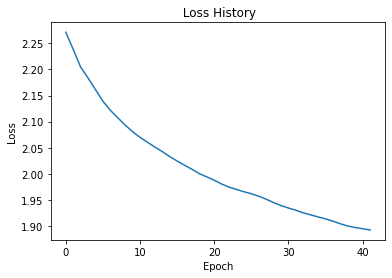

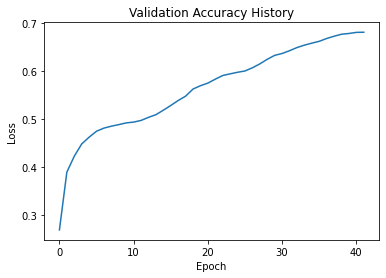

Score = -0.00011666786303976551 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00025636175996623933 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00018594847642816603 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.5932953576557338e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022273311333265156 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00010224823199678212 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0007070631254464388 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00034485594369471073 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.00584496371448e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0004990656743757427 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00039045041194185615 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001404147333232686 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003901355667039752 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001387940428685397 and threshold -0.03
('172.18

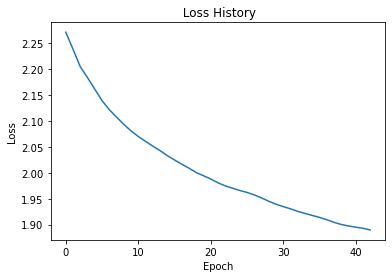

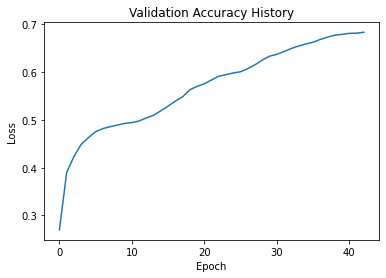

Score = -0.0001937327324412763 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00015694783360231668 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00017102899437304586 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.578187018632889e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00017133544315584004 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0005356160691007972 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013517809566110373 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011887247092090547 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.033102156128734e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.7431739252060652e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002184131881222129 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.3286454961635172e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.215949542820454e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.464056110009551e-05 and threshold -0.03
('172.18.0.

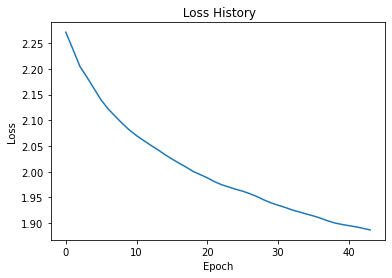

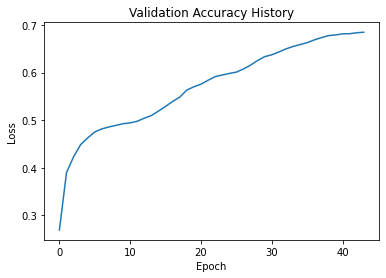

Score = 0.00014636354171670973 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020614577806554735 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020065811986569315 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.964445441961288e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003086686774622649 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.4338820367120206e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.2438078303821385e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00016691152995917946 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.057940921280533e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.523495979607105e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.2364187063649297e-07 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020062722614966333 and threshold -0.03
('172.18.0.3', 1232)
Score = 3.2809359254315495e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.146351860370487e-05 and threshold -0.03
('172.18.0.3

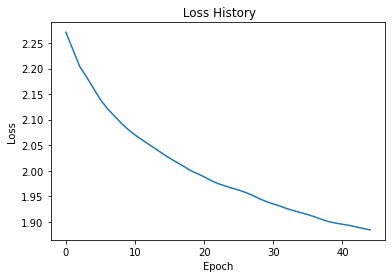

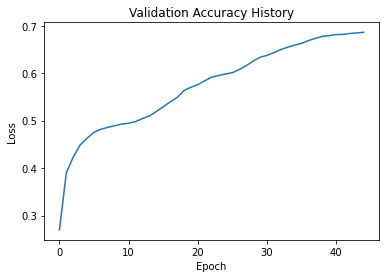

Score = -1.0051109711639583e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011390738654881716 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.4099678082857281e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.7533409593161196e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.6054850574582815e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.95802116044797e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.219734106911346e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.817230703542009e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.839152774773538e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.5729136066511273e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016200476966332644 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011688596714520827 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001537927455501631 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00022499155602417886 and threshold -0.03
('172.1

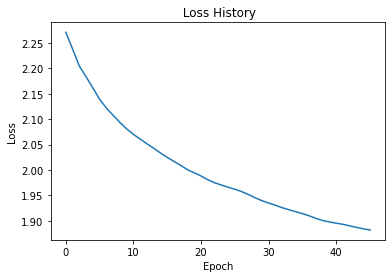

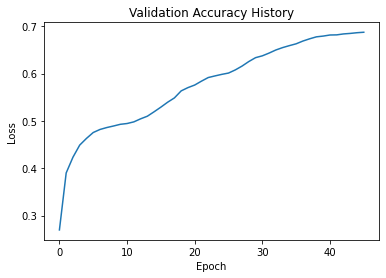

Score = -0.00014566998288501054 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.000144319623359479 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00023767477250657976 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001923746895045042 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002632577088661492 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020549568580463529 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001430970150977373 and threshold -0.03
('172.18.0.3', 1232)
Score = 0.00011854688636958599 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00020781149214599282 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00021167960949242115 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.022833647672087e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.0465671443380415e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0002125159662682563 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.967913703992963e-06 and threshold -0.03
('172.18.

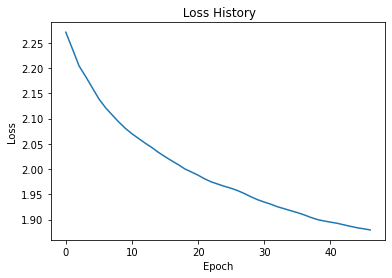

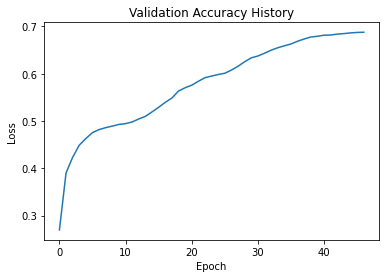

Score = -8.464459824608639e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 5.028305167797953e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = 1.9951461581513286e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011853728938149288 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.268317131092772e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.328229498350993e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.0660201446153224e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -9.21201499295421e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011434669431764632 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001323628384852782 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.7100024453829974e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.946553523652256e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.3675911001628265e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.2035528672859073e-06 and threshold -0.03
('172.18.0

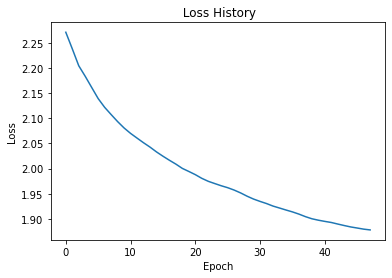

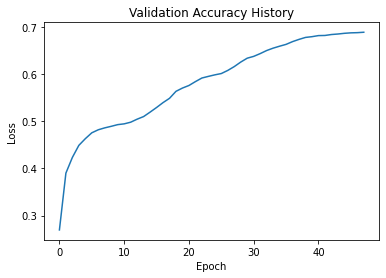

Score = -0.00014352743164636195 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00010590001329546794 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.7176294174278155e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.0807793993735686e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00011706422083079815 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.205655517987907e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0001087449854821898 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.597259536851197e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 2.5425077183172107e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -5.0649068725761026e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 9.514075645711273e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -7.087982521625236e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.846206765156239e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00029130096663720906 and threshold -0.03
('172.1

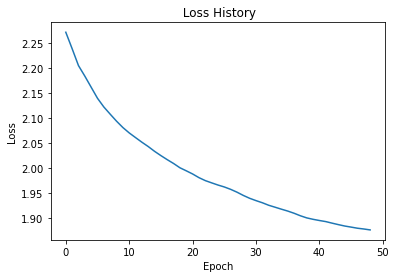

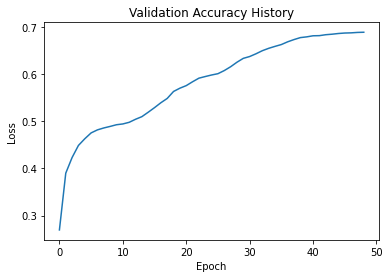

Score = 3.157631363137625e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.2643830965971574e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -6.272830069065094e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -4.1441140638198704e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -2.0674342522397637e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00016996479826048017 and threshold -0.03
('172.18.0.3', 1232)
Score = -1.8182334315497428e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = -8.985887689050287e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -3.5046323318965733e-06 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00014300801558420062 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.0003632084117271006 and threshold -0.03
('172.18.0.3', 1232)
Score = -0.00013304559979587793 and threshold -0.03
('172.18.0.3', 1232)
Score = 6.582056812476367e-05 and threshold -0.03
('172.18.0.3', 1232)
Score = 8.799703209660947e-06 and threshold -0.03
('172.18

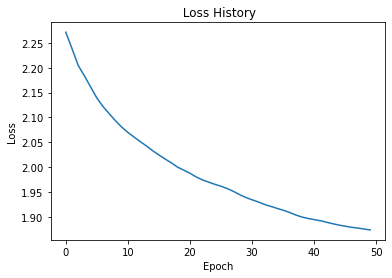

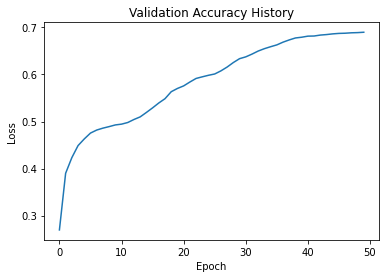

Score = -9.246889385394752e-05 and threshold -0.03


In [4]:
maxit = 1000
k = 5
ns = 128
gamma = lr
epsilon = 3
rho = 0.002

step = 0
num_steps_per_val = 20
th = threading.Thread(target=model_server, daemon=True)
th.start()

validation_grad = {}  # this dict stores validation gradients
train_loss_history = []
validation_loss_history = []
validation_accuracy_history = []

threshold = -gamma*epsilon

while (step <= maxit):
    if (step%k==0): 
        opt.zero_grad()
        val_pred = model(val_data.type(torch.float32))
        val_loss = lossfn(val_pred, val_targets)
        val_loss.backward()
        for name, p in model.named_parameters():
            validation_grad[name] = p.grad.clone().detach()
            
    while True:
        #receive g
#         print("Waiting for gradients from workers...")
        g_tilde = serv_grad.recv()  # receive a state_dict
#         print(f"Received gradient {str(g_tilde)}. Normalizing") 
        g = rescale_params(g_tilde, validation_grad)
        score = compute_stochastic_descent_score(g, validation_grad, gamma, rho)
        print(f"Score = {score} and threshold {threshold}")
        if score >= threshold:
#             print("Accepted gradient")
            break
        else:
            print(f"Rejected gradient")
    
    # we are here only if we pass the score test... update with SGD
    opt.zero_grad()
    update_gradient(model, g)
    opt.step()
    
#     print(f"Step {step}: Updated weight.")

    if (step+1) % num_steps_per_val == 0:
        # validation
        epoch_val_loss, epoch_val_acc = validate(model, val_loader, lossfn)
        print(f"Step {step}'s: validation loss = {epoch_val_loss}, and validation accuracy = {epoch_val_acc}")
        validation_loss_history.append(epoch_val_loss)
        validation_accuracy_history.append(epoch_val_acc)
        # visualization
        plt.plot(range(len(validation_loss_history)), validation_loss_history, label="Validation Loss")
        plt.title(f" Loss History")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

        plt.plot(range(len(validation_accuracy_history)), validation_accuracy_history, label="Validation Accuracy")
        plt.title("Validation Accuracy History")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()
    step += 1 


In [5]:
val_ds.dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

('172.18.0.3', 1232)
('172.18.0.3', 1232)
('172.18.0.3', 1232)
('172.18.0.3', 1232)
('172.18.0.3', 1232)
('172.18.0.3', 1232)
('172.18.0.3', 1232)
